In [2]:
# K-means Clustering unsupervised learning  classification

In [3]:
# K-means clustering en yakin centroide gore 

In [4]:
from sklearn.cluster import KMeans 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [5]:
df=pd.read_csv("Avm_Musterileri.csv")
df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


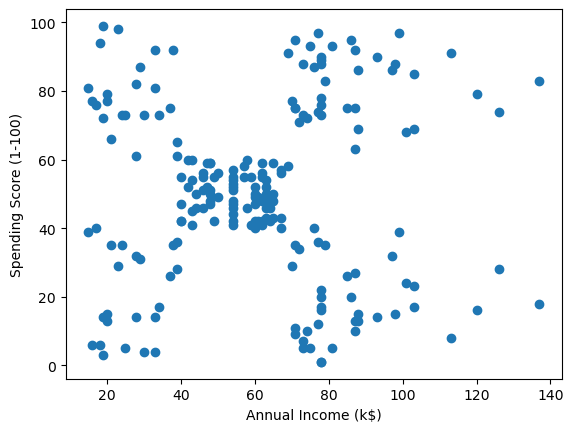

In [6]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [8]:
df.rename(columns={'Annual Income (k$)':'income'},inplace=True)
df.rename(columns={'Spending Score (1-100)':'score'},inplace=True)

In [11]:
# normalization

In [10]:
scaler=MinMaxScaler()
scaler.fit(df[['income']])
df['income']=scaler.transform(df[['income']])
scaler.fit(df[['score']])
df['score']=scaler.transform(df[['score']])
df.head()

,CustomerID,income,score
0,1,0.000000,0.387755
1,2,0.000000,0.816327
2,3,0.008197,0.051020
3,4,0.008197,0.775510
4,5,0.016393,0.397959


In [12]:
df.tail()

,CustomerID,income,score
195,196,0.860656,0.795918
196,197,0.909836,0.275510
197,198,0.909836,0.744898
198,199,1.000000,0.173469
199,200,1.000000,0.836735


In [19]:
# elbow yontemi
k_range = range(1,11)

list_dist = []

for k in k_range:
    kmeans_modelim = KMeans(n_clusters=k)
    kmeans_modelim.fit(df[['income','score']])
    list_dist.append(kmeans_modelim.inertia_)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

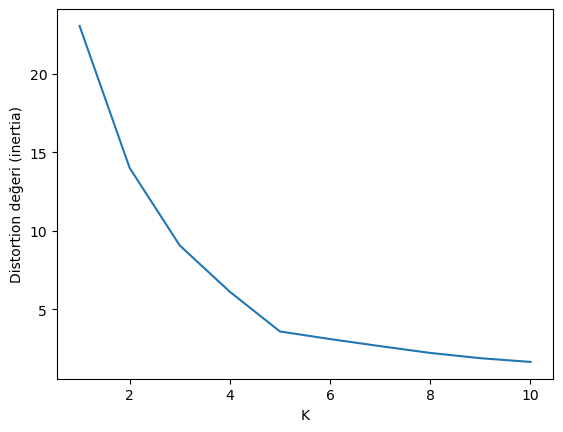

In [14]:
plt.xlabel('K')
plt.ylabel('Distortion değeri (inertia)')
plt.plot(k_range,list_dist)
plt.show()

In [15]:
# K = 5 için bir K-Means modeli oluşturalım:
kmeans_modelim = KMeans(n_clusters = 5)
y_predicted = kmeans_modelim.fit_predict(df[['income','score']])
y_predicted

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0,
       1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 4, 0, 4, 2, 4, 2, 4,
       0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4])

In [16]:
df['cluster'] = y_predicted
df.head()

,CustomerID,income,score,cluster
0,1,0.000000,0.387755,1
1,2,0.000000,0.816327,3
2,3,0.008197,0.051020,1
3,4,0.008197,0.775510,3
4,5,0.016393,0.397959,1


In [17]:
# Centroidleri görelim:
kmeans_modelim.cluster_centers_ 

array([[0.33029751, 0.49508692],
       [0.09265859, 0.20319432],
       [0.6       , 0.16443149],
       [0.08792846, 0.79962894],
       [0.58638083, 0.82783883]])

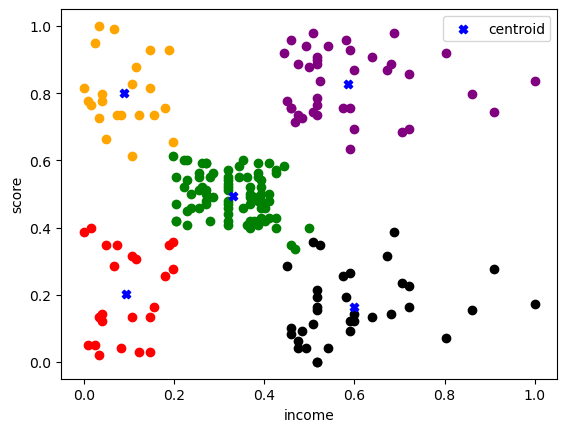

In [18]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]


plt.xlabel('income')
plt.ylabel('score')
plt.scatter(df1['income'],df1['score'],color='green')
plt.scatter(df2['income'],df2['score'],color='red')
plt.scatter(df3['income'],df3['score'],color='black')
plt.scatter(df4['income'],df4['score'],color='orange')
plt.scatter(df5['income'],df5['score'],color='purple')



# kmeans_modelim.cluster_centers_ numpy 2 boyutlu array olduğu için x ve y sütunlarını kmeans_modelim.cluster_centers_[:,0] 
# ve kmeans_modelim.cluster_centers_[:,1] şeklinde scatter plot için alıyoruz:
plt.scatter(kmeans_modelim.cluster_centers_[:,0], kmeans_modelim.cluster_centers_[:,1], color='blue', marker='X', label='centroid')
plt.legend()
plt.show()